# MOwNiT
## Laboratorium 2
### Analiza danych - DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- W przypadku włąsnej instalacji należy zaistalować pakiet:

```julia
Pkg.add("DataFrames")
```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn może przechowywać inny typ (inaczej niż w dwuwymiarowych tablicach )
- od wersji 0.11 każda z kolumn jest typu Array{T,1} gdzie T jest okreslonym typem danych (np. Float64)
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja najnowszej wersji: https://juliadata.github.io/DataFrames.jl/stable/index.html





In [10]:
# za pierwszym razem instalujemy
using Pkg
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `C:\Users\danie\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\danie\.julia\environments\v1.7\Manifest.toml`


In [8]:
# Tworzenie DataFrame
using DataFrames
df1=DataFrame()
df1.MojaKolumna= 1:4
df1.x2= [4,pi,sqrt(2), 42]
df1.Col3= [true,false, true, false]
show(df1)

4×3 DataFrame
 Row │ MojaKolumna  x2        Col3  
     │ Int64        Float64   Bool  
─────┼──────────────────────────────
   1 │           1   4.0       true
   2 │           2   3.14159  false
   3 │           3   1.41421   true
   4 │           4  42.0      false

In [9]:
# ! - nie tworzy kopii, : - tworzy kopię
typeof(df1[!,2])

Vector{Float64} (alias for Array{Float64, 1})

In [8]:
typeof(df1[:,2])

Vector{Float64} (alias for Array{Float64, 1})

In [10]:
typeof(df1.Col3)

Vector{Bool} (alias for Array{Bool, 1})

In [11]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[2,pi, sqrt(2), 3, 4,2,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,1
2,2,3.14159,1
3,3,1.41421,0
4,4,3.0,1
5,5,4.0,0
6,6,2.0,1
7,7,3.14159,1
8,8,1.41421,0
9,9,3.0,1


In [7]:
# ilosc wierszy
size(df2, 1) 

10

In [8]:
#ilosc kolumn
size(df2, 2) 

3

In [9]:
# można odwoływać się po indeksie
show(df2[:,2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [10]:
# albo po symbolu kolumny
show(df2[!,:Col2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [11]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

DataFrameRow
 Row │ MojaKolumna  Col2     Col3  
     │ Int64        Float64  Bool  
─────┼─────────────────────────────
   3 │           3  1.41421  false

In [12]:
# drugi i trzeci wiersz
df2[2:3, :]

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,2,3.14159,1
2,3,1.41421,0


In [13]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element Vector{Float64}:
 3.141592653589793
 1.4142135623730951

In [14]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
,Float64,Bool
1,3.14159,1
2,1.41421,0


In [15]:
# pierwsze sześć wierszy
DataFrames.first(df2,6)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,1
2,2,3.14159,1
3,3,1.41421,0
4,4,3.0,1
5,5,4.0,0
6,6,2.0,1


In [16]:
# ostatnie sześć wierszy
DataFrames.last(df2,6)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,5,4.0,0
2,6,2.0,1
3,7,3.14159,1
4,8,1.41421,0
5,9,3.0,1
6,10,4.0,0


In [17]:
# nazwy kolumn
names(df2)

3-element Vector{String}:
 "MojaKolumna"
 "Col2"
 "Col3"

In [18]:
# typy kolumn
eltype.(eachcol(df2))

3-element Vector{DataType}:
 Int64
 Float64
 Bool

In [19]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,MojaKolumna,5.5,1,5.5,10,0,Int64
2,Col2,2.71116,1.41421,3.0,4.0,0,Float64
3,Col3,0.6,0,1.0,1,0,Bool


In [12]:
using Statistics
mean(df2.Col2)

2.711161243192578

In [13]:
var(df2.Col2)

0.9150284373648316

In [11]:
#Pkg.add("CSV")
using CSV
input="winequality.csv"
mydata=CSV.read(input, delim=";",DataFrame)

LoadError: ArgumentError: "winequality.csv" is not a valid file or doesn't exist

In [23]:
describe(mydata)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,fixed acidity,8.31964,4.6,7.9,15.9,0,Float64
2,volatile acidity,0.527821,0.12,0.52,1.58,0,Float64
3,citric acid,0.270976,0.0,0.26,1.0,0,Float64
4,residual sugar,2.53881,0.9,2.2,15.5,0,Float64
5,chlorides,0.0874665,0.012,0.079,0.611,0,Float64
6,free sulfur dioxide,15.8749,1.0,14.0,72.0,0,Float64
7,total sulfur dioxide,46.4678,6.0,38.0,289.0,0,Float64
8,density,0.996747,0.99007,0.99675,1.00369,0,Float64
9,pH,3.31111,2.74,3.31,4.01,0,Float64


In [24]:
typeof(mydata)

DataFrame

In [25]:
size(mydata)

(1599, 12)

In [4]:
# Dzielenie DataFrame na podgrupy i działania na nich

# Split -Apply - Combine

#https://dataframes.juliadata.org/stable/man/split_apply_combine/

# rozdzielanie na podgrupy po jakości wina (quality)
# Split

wine_grouped=groupby(mydata, :quality)
typeof(wine_grouped)

LoadError: UndefVarError: mydata not defined

In [27]:

# podsumowanie ile jest win w każdej grupie 
combine(wine_grouped, nrow)

,quality,nrow
,Int64,Int64
1,3,10
2,4,53
3,5,681
4,6,638
5,7,199
6,8,18


In [28]:
combine(wine_grouped, "fixed acidity" => mean)

,quality,fixed acidity_mean
,Int64,Float64
1,3,8.36
2,4,7.77925
3,5,8.16725
4,6,8.34718
5,7,8.87236
6,8,8.56667


In [29]:
# zliczenie liczby win o danej jakości i zawartości alkoholu, posortowane
wine_grouped2=sort(combine(groupby(mydata, [:quality,:alcohol]),nrow=> :liczba), [:quality,:alcohol])

,quality,alcohol,liczba
,Int64,Float64,Int64
1,3,8.4,1
2,3,9.0,1
3,3,9.7,1
4,3,9.8,1
5,3,9.9,1
6,3,9.95,1
7,3,10.2,1
8,3,10.7,1
9,3,10.9,1


In [30]:
# zapis do pliku
CSV.write("dataframe1.csv", wine_grouped2)

"dataframe1.csv"


### Graficzna reprezentacja DataFrames




In [44]:
using DataFrames
df = DataFrame(a = 1:10, b = map(x->2x,(1:10)), c = map(x->log(x),(1:10)), d=rand(10), e=map(x->x%2,(1:10)))

,a,b,c,d,e
,Int64,Int64,Float64,Float64,Int64
1,1,2,0.0,0.824734,1
2,2,4,0.693147,0.967264,0
3,3,6,1.09861,0.247067,1
4,4,8,1.38629,0.692023,0
5,5,10,1.60944,0.722618,1
6,6,12,1.79176,0.720217,0
7,7,14,1.94591,0.84451,1
8,8,16,2.07944,0.95203,0
9,9,18,2.19722,0.83426,1


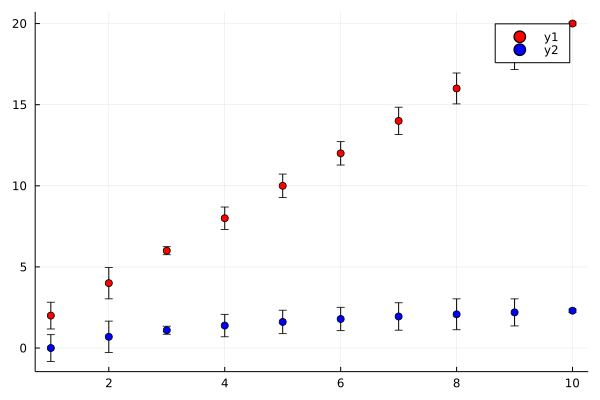

In [45]:
# Mozna odwolywac sie bezposrednio do kolumn w poniższy sposób (gdyz sa typu jednowymiarowych tablic 
# Array{T,1})

using Plots
scatter(df.a, [df.b, df.c], colour = [:red :blue], yerr=df.d)


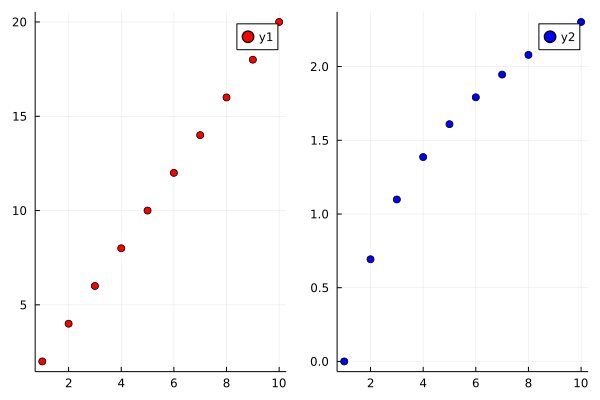

In [46]:
# użycie opcji layout
scatter(df.a, [df.b, df.c],  colour = [:red :blue ], layout=2)

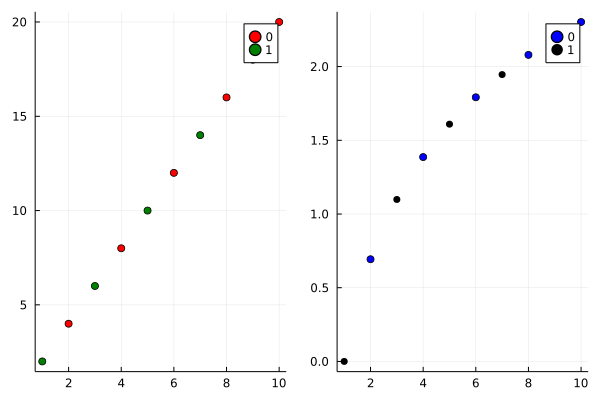

In [47]:
# użycie opcji layout i grup
scatter(df.a, [df.b, df.c], group=df.e,  colour = [:red :blue :green :black], layout=2)

Uwaga: Ze względu na specyfikę języka Julia pomiar czasu wykonania należy brać pod uwagę dopiero od drugiego wywołania danej funkcji
(za pierwszym razem mierzymy również czas kompilacji)

Makro @time - zwraca wartość funkcji i wypisuje czas jej trwania.
Makro @elapsed zwraca czas trwania (może być wygodniejsze w użyciu). 
Warto też oglądnąć działanie makr @timev, @timed, i @allocated

https://docs.julialang.org/en/v1/base/base/#Base.@time

Rand(10) - wylosuj 10-elementową tablicę Float64 z przedziału [0,1)

https://docs.julialang.org/en/v1/stdlib/Random/#Base.rand

### Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

In [8]:
using LinearAlgebra

In [31]:
vector_len = []
operation_type = []
operation_time = []

# for vector_log10 in 1:3
#     for try_id in 1:10
#         push!(operation_type, "dot")
        
#         curr_vec_len = 10 ^ vector_log10
#         push!(vector_len, curr_vec_len)
        
#         vector1 = rand(curr_vec_len)
#         vector2 = rand(curr_vec_len)
#         push!(operation_time, @elapsed dot(vector1, vector2))
#     end
# end

for i in 1:100
    for try_id in 1:10
        push!(operation_type, "dot")
        
        curr_vec_len = 10 * i
        push!(vector_len, curr_vec_len)
        
        vector1 = rand(curr_vec_len)
        vector2 = rand(curr_vec_len)
        push!(operation_time, @elapsed dot(vector1, vector2))
    end
end

# for vector_log10 in 1:3
#     for try_id in 1:10
#         push!(operation_type, "matrix multiplication")
        
#         curr_vec_len = 10 ^ vector_log10
#         push!(vector_len, curr_vec_len)
        
#         matrix = rand(curr_vec_len, curr_vec_len)
#         vector = rand(curr_vec_len)
#         push!(operation_time, @elapsed matrix * vector)
#     end
# end

for i in 1:100
    for try_id in 1:10
        push!(operation_type, "matrix multiplication")
        
        curr_vec_len = 10 * i
        push!(vector_len, curr_vec_len)
        
        matrix = rand(curr_vec_len, curr_vec_len)
        vector = rand(curr_vec_len)
        push!(operation_time, @elapsed matrix * vector)
    end
end

In [32]:
import Pkg; Pkg.add("CSV")

   Resolving package versions...
  No Changes to `C:\Users\danie\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\danie\.julia\environments\v1.7\Manifest.toml`


In [33]:
using DataFrames
using CSV
using Statistics

input_data_frame = DataFrame(Vector_length = vector_len, Operation_type = operation_type, Operation_time = operation_time)

touch("data.csv")
csv_file = open("data.csv","w")

CSV.write("data.csv", input_data_frame)


"data.csv"

In [34]:
df = DataFrame(CSV.File("data.csv"))

,Vector_length,Operation_type,Operation_time
,Int64,String31,Float64
1,10,dot,2.4e-6
2,10,dot,1.0e-7
3,10,dot,1.0e-7
4,10,dot,1.0e-7
5,10,dot,1.0e-7
6,10,dot,1.0e-7
7,10,dot,1.0e-7
8,10,dot,1.0e-7
9,10,dot,1.0e-7


In [35]:
df_grouped=groupby(df, [:Operation_type,:Vector_length])
# df_grouped=groupby(df, :Vector_length)
df_combined = combine(df_grouped, nrow, "Operation_time" => mean, "Operation_time" => std)
# df_combined = combine(df_grouped, nrow)
df_combined

,Operation_type,Vector_length,nrow,Operation_time_mean,Operation_time_std
,String31,Int64,Int64,Float64,Float64
1,dot,10,10,3.3e-7,7.27324e-7
2,dot,20,10,1.1e-7,7.37865e-8
3,dot,30,10,1.1e-7,3.16228e-8
4,dot,40,10,1.2e-7,4.21637e-8
5,dot,50,10,9.0e-8,3.16228e-8
6,dot,60,10,1.5e-7,5.27046e-8
7,dot,70,10,1.1e-7,3.16228e-8
8,dot,80,10,1.0e-7,0.0
9,dot,90,10,1.2e-7,4.21637e-8


In [1]:
using Plots
scatter(df_combined.Vector_length, df_combined.Operation_time_mean,
    group=df_combined.Operation_type, yerr=df_combined.Operation_time_std,
    layout=2, colour = [:red :blue], xlabel="Vector length", ylabel="Operation time", size = (900,700))

LoadError: UndefVarError: df_combined not defined